In [1]:
import rboot
import pandas_datareader.data as web
import datetime
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt
import seaborn

## Get some data

In [7]:
""" Get Sample Data """
# The sample series length
N = 100

# Get sample data
spy = web.DataReader('SPY', 'yahoo', datetime.date(2000,1,1))['Adj Close']

# Take the most recent N+1 values
spy = spy[-N-1:]

# Compute Log Returns
log_rets = np.log(spy) - np.log(spy.shift(1))
log_rets = log_rets.dropna()

## Bootstrap the returns

In [9]:
bootstraps = 100
bs_series = rboot.replacement_bootstrap(log_rets, bootstraps, seed=1978, replacement_percentage=0.25, replace=False, rho=0.10)

## Plot the trajectories and distribution of returns

/home/amir/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


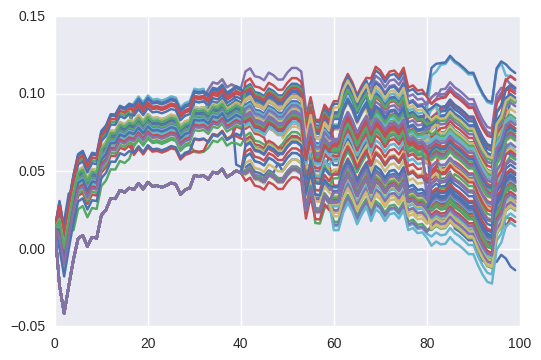

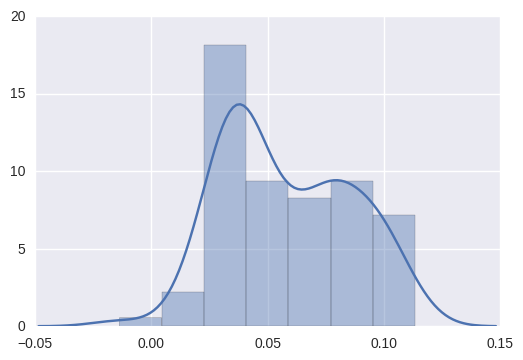

In [10]:
montecarlo = np.array([np.cumsum(v) for v in bs_series]).T
plt.plot(montecarlo);
fig,ax = plt.subplots()
seaborn.distplot(montecarlo[-1,:],ax=ax);